In [38]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
from matplotlib.pylab import rcParams
from pandas import Series, datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import random
from xgboost import XGBClassifier
import seaborn as sns

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [5]:
news_w_label = pd.read_csv("Datasets/Combined_News_DJIA.csv")
print(news_w_label.shape)
print(news_w_label.columns)
news_w_label.head(20)

(1989, 27)
Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [6]:
djia = pd.read_csv("./Datasets/upload_DJIA_table.csv")
print(djia.shape)
print(djia.columns)
djia.head(20)

(1989, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
7,2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078
8,2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469
9,2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141


In [7]:
#Merge both datasets
djia_merged = news_w_label.merge(djia, how='inner', on='Date') 
djia_merged.head(20)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS 

In [8]:
djia_merged.isnull().sum() #Find the number of null records

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        1
Top24        3
Top25        3
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
djia_merged[djia_merged['Top25'].isnull()] # Find the null records

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",b'Two months after the Pakistani Army wrested ...,b'N. Korean cargo ship repels pirates off Soma...,b'Canada: Stephen Harper attempts to prop up r...,b'New geological data provides hope for claims...,b'Ukraine set to block Elton John adoption bec...,b'German plane makes emergency landing',b'Street artist catches chief of the Israeli a...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN,9626.419922,9713.709961,9580.929688,9683.410156,224030000,9683.410156
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...","b""Cool Saudi Feminist calls for woman's right ...","b'According to satellite surveys, as much as 8...",b'Italian Prime Minister Silvio Berlusconi has...,"b""Don't blame the system for winter travel cha...",b'Christmas Eve around the world included the ...,b'Pope knocked down before Xmas mass',b'The solar salesman who put his cow on the ma...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN,10467.120117,10522.059570,10461.679688,10520.089844,52670000,10520.089844
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,Next war in line: At least 20 South Sudanese a...,Bahraini protester ends hunger strike after be...,China tries to scare motorists into safer driving,Leaked Report Shows England Hit With Three Nuc...,Japans cyclone season approaches.,Have Oman and Qatar escaped the Arab revolts?,Rioters torch Australia asylum seeker detentio...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN,12453.620117,12506.059570,12447.559570,12505.990234,166630000,12505.990234


In [10]:
djia_merged.fillna("", inplace=True) # Set the NaN values as empty string
djia_merged.isnull().sum() # Check to see that the values have been replaced successfully

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        0
Top24        0
Top25        0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

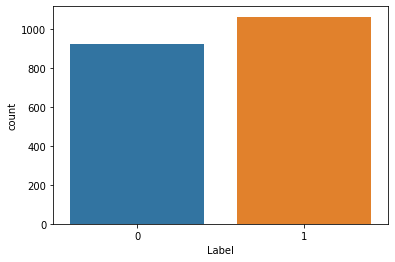

In [11]:
# Count of labels
sns.countplot(x='Label', data=djia_merged)
plt.show()

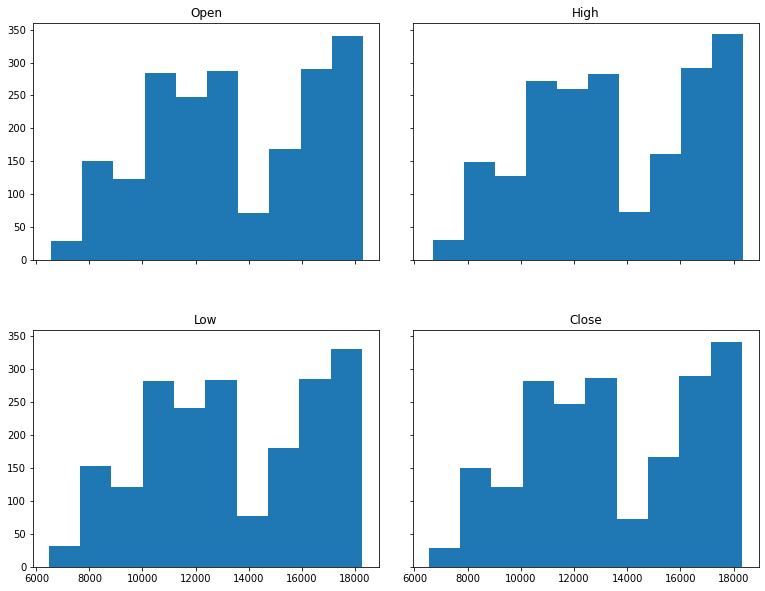

In [12]:
# Histpgrams for existing columns
cols = list(djia.columns[1:-2])
cnt = 0
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(13, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(2):
    for j in range(2):
        ax[i, j].hist(djia_merged[cols[cnt]])
        ax[i, j].set_title(cols[cnt])
        cnt += 1

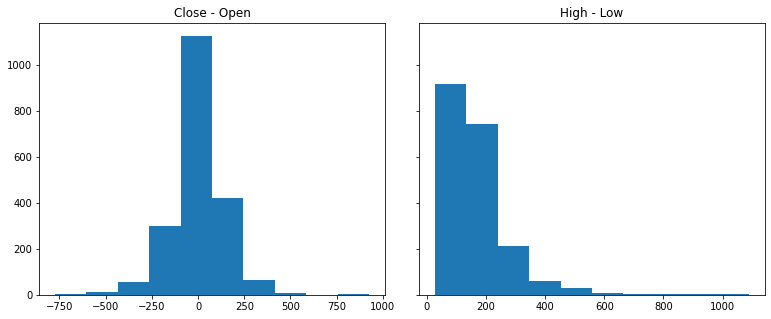

In [13]:
# Histograms for differences
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(13, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
ax[0].hist(djia_merged['Close']-djia_merged['Open'])
ax[0].set_title('Close - Open')
ax[1].hist(djia_merged['High']-djia_merged['Low'])
ax[1].set_title('High - Low')
plt.show()

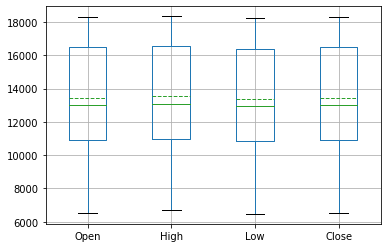

In [14]:
# Box plots for existing columns
cols = list(djia.columns[1:-2])
djia_merged.boxplot(cols, meanline=True, showmeans=True)
plt.show()

In [15]:
# Information about difference of closing price with the previous day's closing price
data = np.array(np.array(djia_merged['Close'][1:]) - np.array(djia_merged['Close'][:-1]))
df = pd.DataFrame(data)
interval_perc = 0.2
print(float(df.quantile(0.5-(interval_perc/2))), float(df.quantile(0.5+(interval_perc/2))))
df.describe()

-14.624218999999716 29.977734000000783


,0
count,1988.000000
mean,3.126282
std,143.366748
min,-777.679688
25%,-60.751221
50%,7.129882
75%,74.961914
max,936.419922


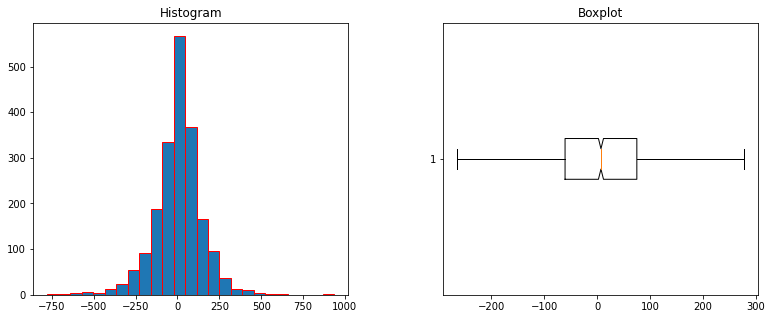

In [16]:
# Plots for difference of closing price with the previous day's closing price
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
ax[0].hist(data, bins = 25, edgecolor="red")
ax[0].set_title('Histogram')
ax[1].boxplot(data, notch=True, vert=False, showfliers=False)
ax[1].set_title('Boxplot')
plt.show()

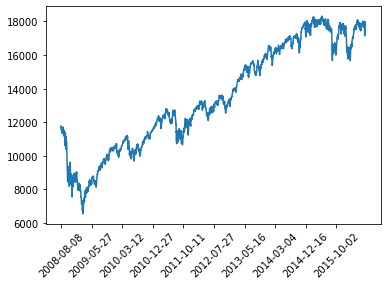

In [17]:
# Basic time series
plt.plot(djia_merged['Date'], djia_merged['Close'])
datelist = [djia_merged['Date'][i] for i in range(0, 2000, 200)]
plt.xticks(ticks=datelist, labels=datelist, rotation = 45)
plt.show()

In [18]:
#Function to calculate Moving Averages
def calc_ma(df, days):
    colname = str(days) + '_Day_MA'
    df[colname] = df['Close']
    for i in range(1, len(df['Date'])):
        if i < days:
            rng = range(i)
            lth = i+1
        else:
            rng = range(i-days+1, i)
            lth = days
        df[colname][i] = sum([df['Close'][j] for j in rng])/lth
    return df

#Function to calculate the signal (1: True, 0: False -> Both 0 indicate 'Hold')
def calc_signal(df, short_days, long_days):
    short_term = str(short_days) + '_Day_MA'
    long_term = str(long_days) + '_Day_MA'
    df['Buy'] = 0
    df['Sell'] = 0
    for i in range(1, len(df['Date'])):
        if (df[short_term][i] > df[long_term][i]) and (df[short_term][i-1] <= df[long_term][i-1]):
            new_df['Buy'][i] = 1 #Buy
        elif (df[short_term][i] < df[long_term][i]) and (df[short_term][i-1] >= df[long_term][i-1]):
            new_df['Sell'][i] = 1 #Sell
    return df

#Function to show plot of MA & signals
def show_graph(df, short_days, long_days):
    short_term = str(short_days) + '_Day_MA'
    long_term = str(long_days) + '_Day_MA'
    fig = plt.figure(figsize=(15, 15))
    plt.plot(df['Close'][long_days:], color="black", label="Closing Price")
    plt.plot(df[short_term][long_days:], color="magenta", linestyle='--', label=str(short_days)+" Days Moving Average")
    plt.plot(df[long_term][long_days:], color="blue", linestyle='--', label=str(long_days)+" Days Moving Average")
    plt.plot(df[long_days:][df['Buy'] == 1][short_term], marker='o', color="green", linestyle='None', label="Golden Cross (Buy)")
    plt.plot(df[long_days:][df['Sell'] == 1][short_term], marker='o', color="red", linestyle='None', label="Death Cross (Sell)")
    plt.legend()
    datelist = [djia_merged['Date'][i] for i in range(long_days, 2000, 100)]
    plt.xticks(ticks=list(range(long_days, 2000, 100)), labels=datelist, rotation = 45)
    plt.show()

In [19]:
# Moving averages in time series
new_df = pd.DataFrame(djia_merged[['Date', 'Close']])
new_df = calc_ma(new_df, 20)
new_df = calc_ma(new_df, 50)
new_df = calc_signal(new_df, 20, 50)
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,20_Day_MA,50_Day_MA,Buy,Sell
0,2008-08-08,11734.320312,11734.320312,11734.320312,0,0
1,2008-08-11,11782.349609,5867.160156,5867.160156,0,0
2,2008-08-12,11642.469727,7838.889974,7838.889974,0,0
3,2008-08-13,11532.959961,8789.784912,8789.784912,0,0
4,2008-08-14,11615.929688,9338.419922,9338.419922,0,0
...,...,...,...,...,...,...
1984,2016-06-27,17140.240234,16910.983008,17434.499844,0,0
1985,2016-06-28,17409.720703,16878.635059,17417.221445,0,0
1986,2016-06-29,17694.679688,16859.637598,17404.343867,0,0
1987,2016-06-30,17929.990234,16852.443555,17396.312070,0,0


No. of Buy signals:  9
No. of Sell signals:  10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


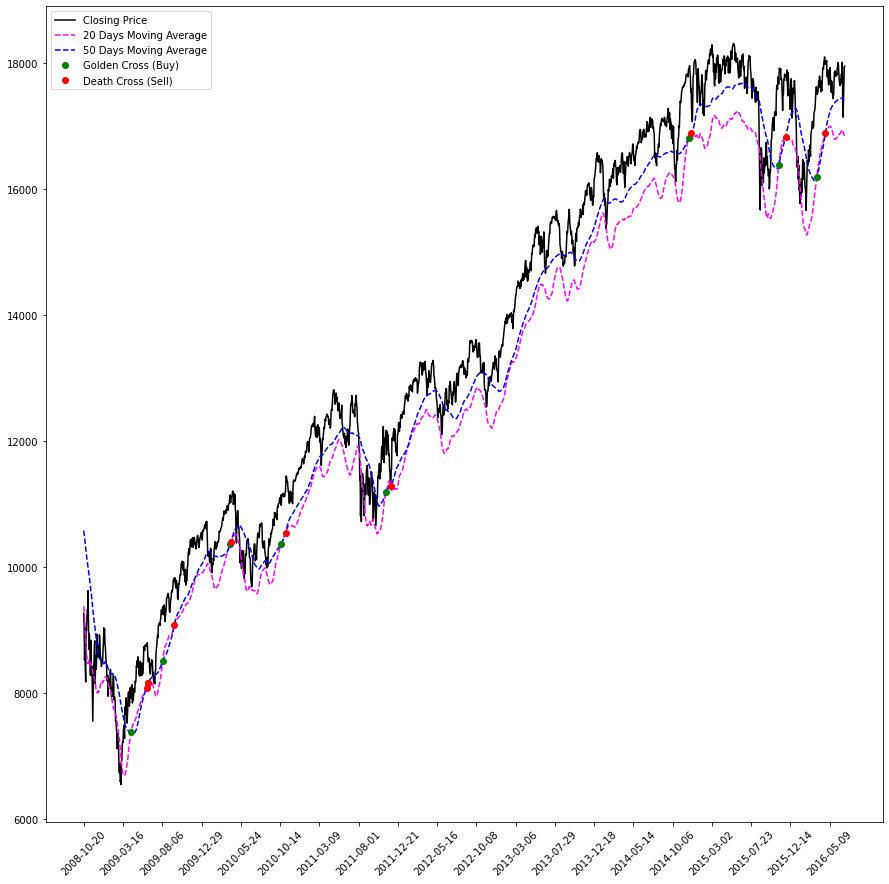

In [20]:
# Plotting MAs
print('No. of Buy signals: ', sum(new_df['Buy']))
print('No. of Sell signals: ', sum(new_df['Sell']))
show_graph(new_df, 20, 50)

In [21]:
# Moving averages in time series
new_df = pd.DataFrame(djia_merged[['Date', 'Close']])
new_df = calc_ma(new_df, 50)
new_df = calc_ma(new_df, 100)
new_df = calc_signal(new_df, 50, 100)
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,50_Day_MA,100_Day_MA,Buy,Sell
0,2008-08-08,11734.320312,11734.320312,11734.320312,0,0
1,2008-08-11,11782.349609,5867.160156,5867.160156,0,0
2,2008-08-12,11642.469727,7838.889974,7838.889974,0,0
3,2008-08-13,11532.959961,8789.784912,8789.784912,0,0
4,2008-08-14,11615.929688,9338.419922,9338.419922,0,0
...,...,...,...,...,...,...
1984,2016-06-27,17140.240234,17434.499844,17244.085947,0,0
1985,2016-06-28,17409.720703,17417.221445,17251.322549,0,0
1986,2016-06-29,17694.679688,17404.343867,17263.370059,0,0
1987,2016-06-30,17929.990234,17396.312070,17280.046357,0,0


No. of Buy signals:  11
No. of Sell signals:  11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


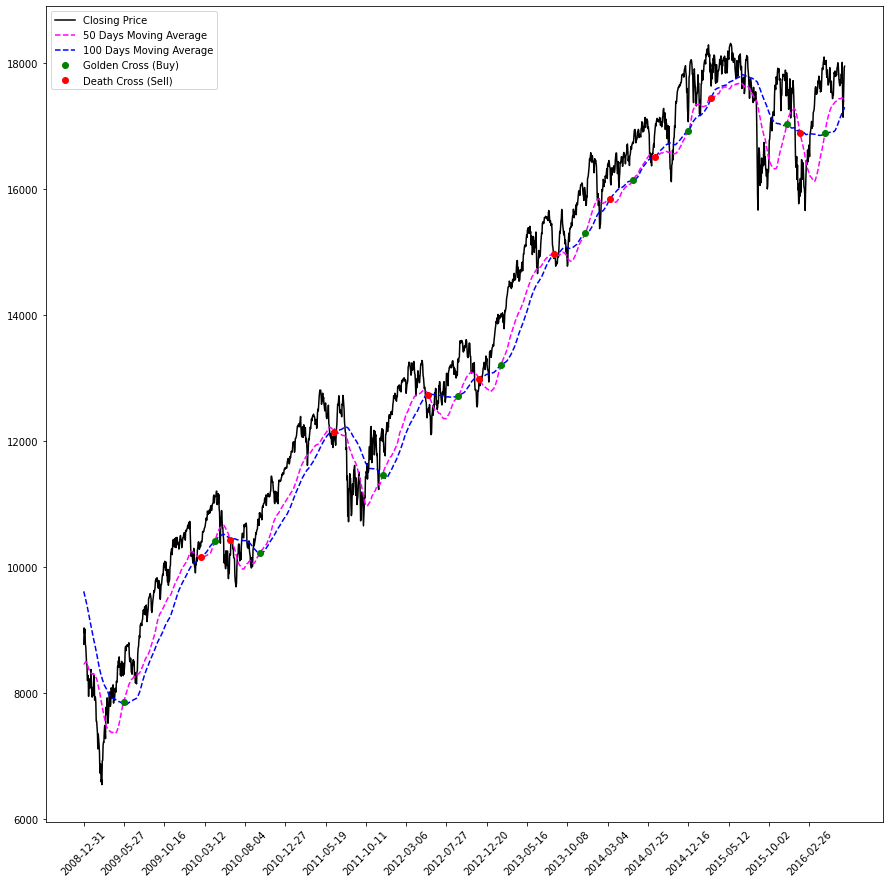

In [22]:
# Plotting MAs
print('No. of Buy signals: ', sum(new_df['Buy']))
print('No. of Sell signals: ', sum(new_df['Sell']))
show_graph(new_df, 50, 100)

In [23]:
# Moving averages in time series
new_df = pd.DataFrame(djia_merged[['Date', 'Close']])
new_df = calc_ma(new_df, 100)
new_df = calc_ma(new_df, 200)
new_df = calc_signal(new_df, 100, 200)
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Close,100_Day_MA,200_Day_MA,Buy,Sell
0,2008-08-08,11734.320312,11734.320312,11734.320312,0,0
1,2008-08-11,11782.349609,5867.160156,5867.160156,0,0
2,2008-08-12,11642.469727,7838.889974,7838.889974,0,0
3,2008-08-13,11532.959961,8789.784912,8789.784912,0,0
4,2008-08-14,11615.929688,9338.419922,9338.419922,0,0
...,...,...,...,...,...,...
1984,2016-06-27,17140.240234,17244.085947,17153.832397,0,0
1985,2016-06-28,17409.720703,17251.322549,17157.368149,0,0
1986,2016-06-29,17694.679688,17263.370059,17162.561953,0,0
1987,2016-06-30,17929.990234,17280.046357,17168.036104,0,0


No. of Buy signals:  5
No. of Sell signals:  5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


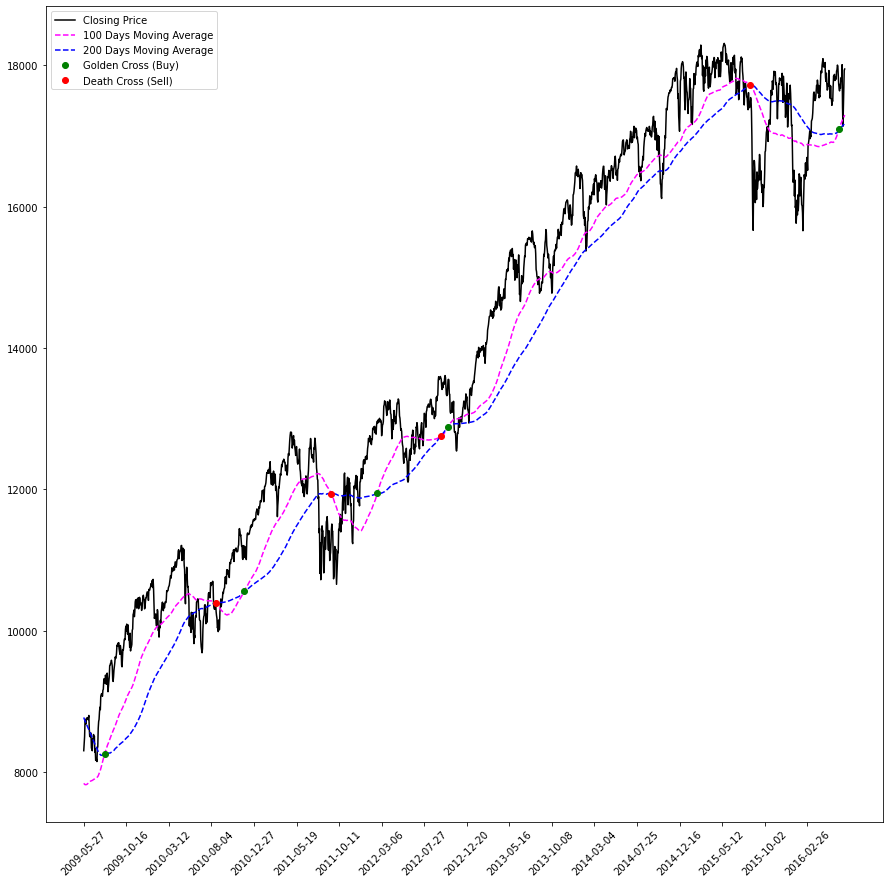

In [24]:
# Plotting MAs
print('No. of Buy signals: ', sum(new_df['Buy']))
print('No. of Sell signals: ', sum(new_df['Sell']))
show_graph(new_df, 100, 200)

### Taking 50-Day & 100-Day Moving average has shown the best result so far

In [25]:
#Function to create ternary label 
#(with respect to last time period, the closing price:-> -1: decresed, 0: remained relatively stable, 1: increased)
def create_label(df, interval_perc):
    data = np.array(np.array(df['Close'][1:]) - np.array(df['Close'][:-1]))
    data = np.insert(data, 0, np.mean(data))
    lower_limit = float(np.quantile(data, 0.5-(interval_perc/2)))
    upper_limit = float(np.quantile(data, 0.5+(interval_perc/2)))
    label = [-1 if num < lower_limit else 1 if num > upper_limit else 0 for num in data]
    df['label_ternary'] = label
    return df

In [26]:
# Moving averages in time series
new_df = pd.DataFrame(djia_merged[['Date', 'Close']])
new_df['20_Day_MA'] = djia_merged['Close']
new_df['50_Day_MA'] = djia_merged['Close']
new_df['Signal'] = 0
for i in range(1, len(new_df['Date'])):
    if i < 20:
        rng = range(i)
        lth = i+1
    else:
        rng = range(i-20+1, i)
        lth = 20
    new_df['20_Day_MA'][i] = sum([new_df['Close'][j] for j in rng])/lth
for i in range(1, len(new_df.Date)):
    if i < 50:
        rng = range(i)
        lth = i+1
    else:
        rng = range(i-50+1, i)
        lth = 50
    new_df['50_Day_MA'][i] = sum([new_df['Close'][j] for j in rng])/lth
    if (new_df['20_Day_MA'][i] > new_df['50_Day_MA'][i]) and (new_df['20_Day_MA'][i-1] <= new_df['50_Day_MA'][i-1]):
        new_df['Signal'][i] = 1 #Buy
    elif (new_df['20_Day_MA'][i] < new_df['50_Day_MA'][i]) and (new_df['20_Day_MA'][i-1] >= new_df['50_Day_MA'][i-1]):
        new_df['Signal'][i] = -1 #Sell
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A va

,Date,Close,20_Day_MA,50_Day_MA,Signal
0,2008-08-08,11734.320312,11734.320312,11734.320312,0
1,2008-08-11,11782.349609,5867.160156,5867.160156,0
2,2008-08-12,11642.469727,7838.889974,7838.889974,0
3,2008-08-13,11532.959961,8789.784912,8789.784912,0
4,2008-08-14,11615.929688,9338.419922,9338.419922,0
...,...,...,...,...,...
1984,2016-06-27,17140.240234,16910.983008,17434.499844,0
1985,2016-06-28,17409.720703,16878.635059,17417.221445,0
1986,2016-06-29,17694.679688,16859.637598,17404.343867,0
1987,2016-06-30,17929.990234,16852.443555,17396.312070,0


In [27]:
new_df['Signal'].value_counts()

 0    1970
-1      10
 1       9
Name: Signal, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


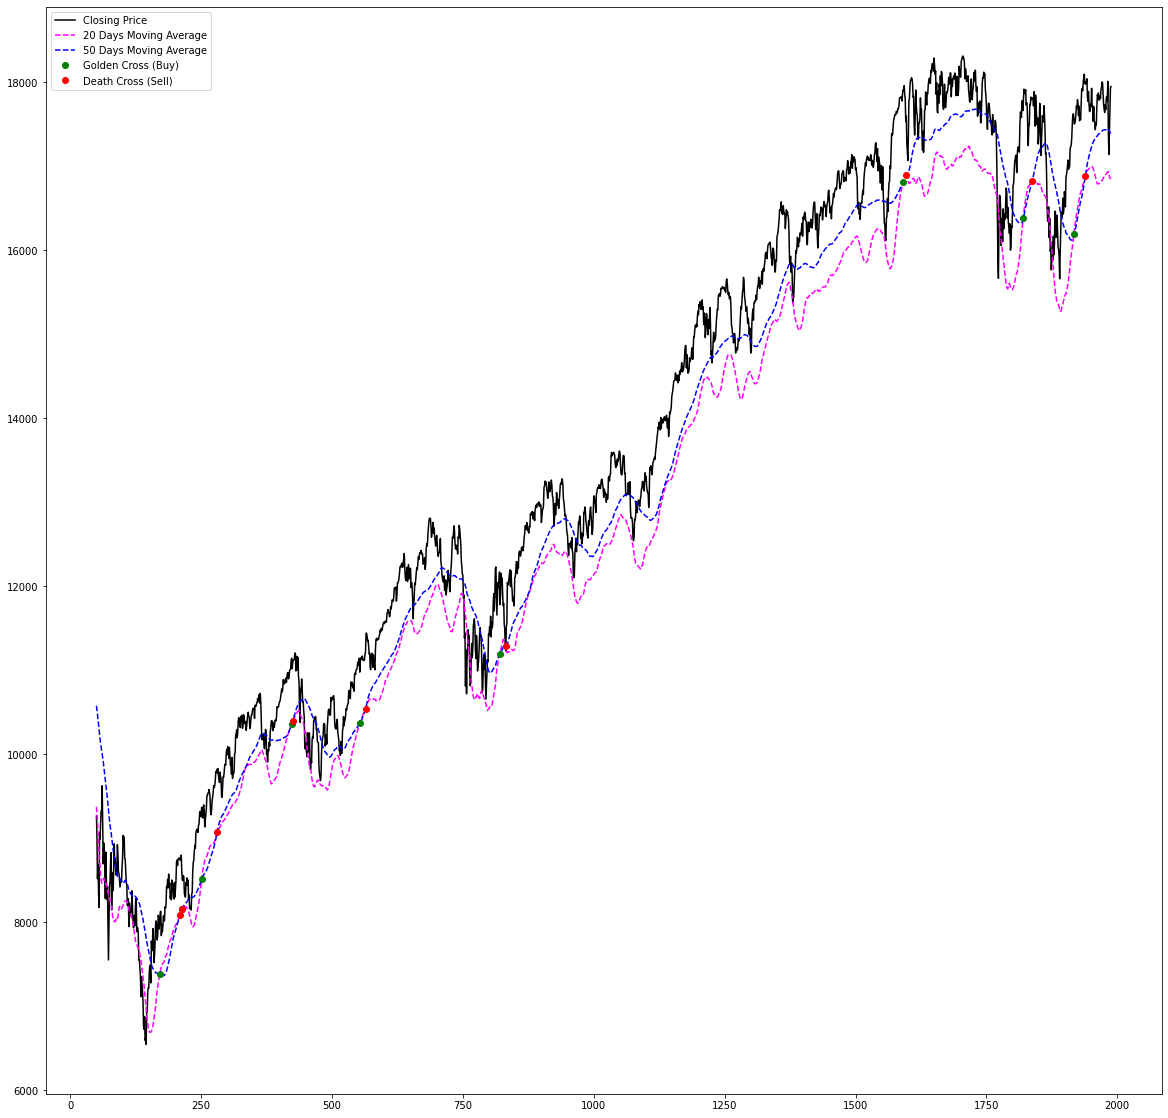

In [28]:
# Plotting MAs
fig = plt.figure(figsize=(20, 20))
plt.plot(new_df['Close'][50:], color="black", label="Closing Price")
plt.plot(new_df['20_Day_MA'][50:], color="magenta", linestyle='--', label="20 Days Moving Average")
plt.plot(new_df['50_Day_MA'][50:], color="blue", linestyle='--', label="50 Days Moving Average")
plt.plot(new_df[50:][new_df['Signal'] == 1]['20_Day_MA'], marker='o', color="green", linestyle='None', label="Golden Cross (Buy)")
plt.plot(new_df[50:][new_df['Signal'] == -1]['20_Day_MA'], marker='o', color="red", linestyle='None', label="Death Cross (Sell)")
plt.legend()
plt.show()

# Model forecasting using ARIMA - Auto Regressive Integrated Moving Average 

The acronym of ARIMA stands for:
AutoRegressive = the model takes advantage of the connection between a predefined number of lagged observations and the current one.
Integrated = differencing between raw observations (eg. subtracting observations at different time steps).
Moving Average = the model takes advantage of the relationship between the residual error and the observations.

The ARIMA model makes use of three main parameters (p,d,q). These are:
P — Auto regressive feature of the model or number of lag observations
D — Differencing order
Q — Moving average feature of the model

ARIMA can lead to particularly good results if applied to short time predictions.

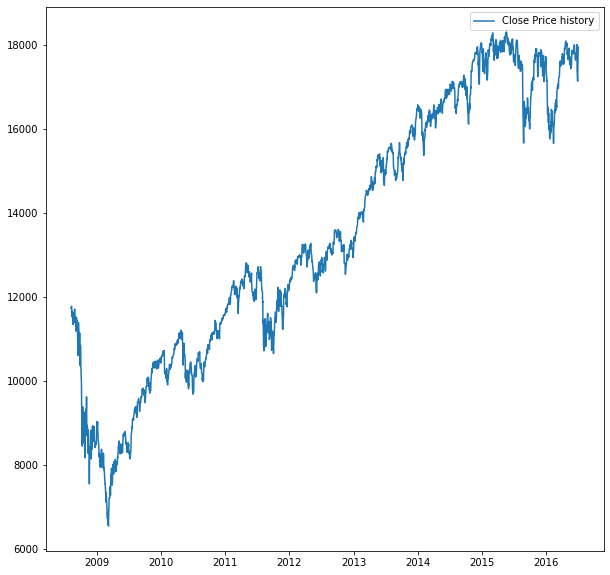

In [29]:
new_df['Date'] = pd.to_datetime(new_df.Date,format='%Y-%m-%d')
fig = plt.figure(figsize=(10, 10))
plt.plot(new_df['Date'], new_df['Close'], label='Close Price history')
plt.legend()

In [30]:
X=new_df[['20_Day_MA','50_Day_MA']]
y=new_df['Close']
y=np.asarray(y)

In [31]:
# Split the initial 80% of the data as training set and the remaining 20% data as the testing set
X_train=X[:int(0.8*len(X))]
X_train_date=new_df['Date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=new_df['Date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

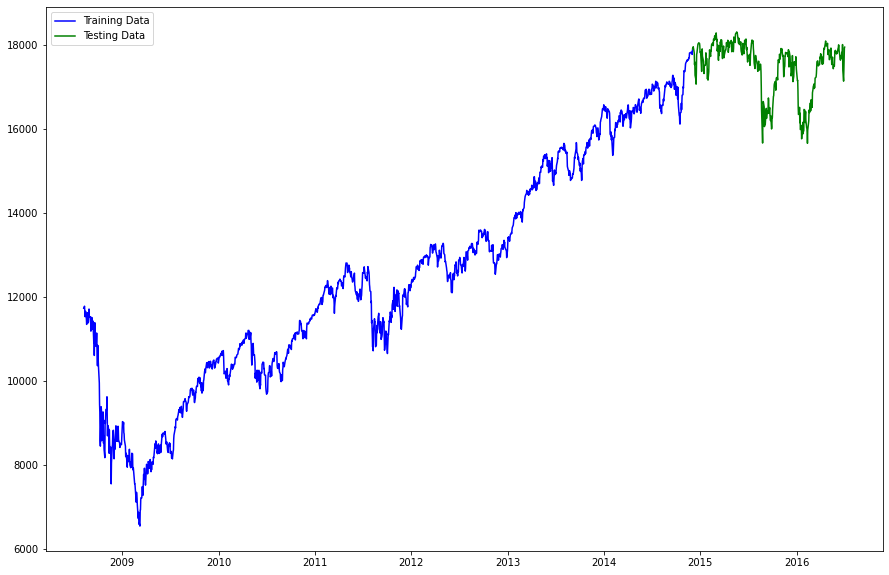

In [32]:
minn=np.min(X_train)
maxx=np.max(X_train)
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-minn)/(maxx-minn)
fig = plt.figure(figsize=(15, 10))
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.legend()

In [33]:
"""So we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, 
uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0."""

history =y_train

predictions = np.array([])
for t in range(len(y_test)):
    #model = ARIMA(history, order=(1,1,0))
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions=np.append(predictions,yhat)
    obs = y_test[t]
    history=np.append(history,obs)
error = np.sqrt(np.mean(np.square(predictions-y_test)))
print('RMS error: ',error)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMS error:  166.74843134433715


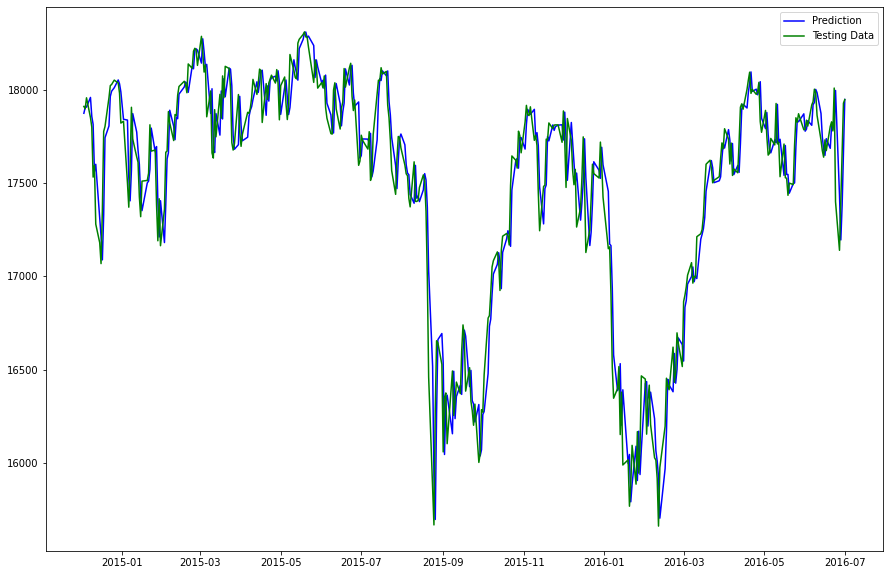

In [34]:
fig = plt.figure(figsize=(15, 10))
plt.plot(X_test_date,predictions, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.legend()
plt.show()

# Model forecasting using LSTM - Long Short Term Memory and GRU - Gated Recurrent Units models

## Dataset preparation
Preparing dataset for training and testing. We use window period (i.e. lookback) as 14 days. Using this 14 day data, we attempt to predict what would be the price on the 15th day.

In [35]:
def split_data(data_raw, lookback):
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

# Reading DJIA dataset

In the follwing two cells we load the dataset and extract the `Close`, `Open`, `High`, and `Low` columns. We use MinMAx scaler to scale the data in the range [0, 1] .  

We observed that the MSE loss is almost same for each of the featres. However, the loss was little better when used the `High` column for trainig and testing. Therefore, we describe below only training and testing on `High` column of the dataset.

In [36]:
close = (djia['Close']).values.reshape(-1,1)
open = (djia['Open']).values.reshape(-1,1)
high = (djia['High']).values.reshape(-1,1)
low = (djia['Low']).values.reshape(-1,1)

In [39]:
sc = MinMaxScaler(feature_range = (0, 1))
open = sc.fit_transform(open)
close = sc.fit_transform(close)
high = sc.fit_transform(high)
low = sc.fit_transform(low)

# Split the data into train and test set  with ratio 0.2

Train set size : 1580

Test set size  :  395

If data is [x0, x1, x2,    , x25] then

    train data = [x0, x1, x2, ..., x11]
    train label = [x13, x4, x15, ..., x25]

In [40]:
lookback = 14 # we loose window period/lookback/sequence length as 14 days
x_train_o, y_train_o, x_test_o, y_test_o = split_data(open, lookback)
x_train_h, y_train_h, x_test_h, y_test_h = split_data(high, lookback)
x_train_l, y_train_l, x_test_l, y_test_l = split_data(low, lookback)
x_train_c, y_train_c, x_test_c, y_test_c = split_data(close, lookback)

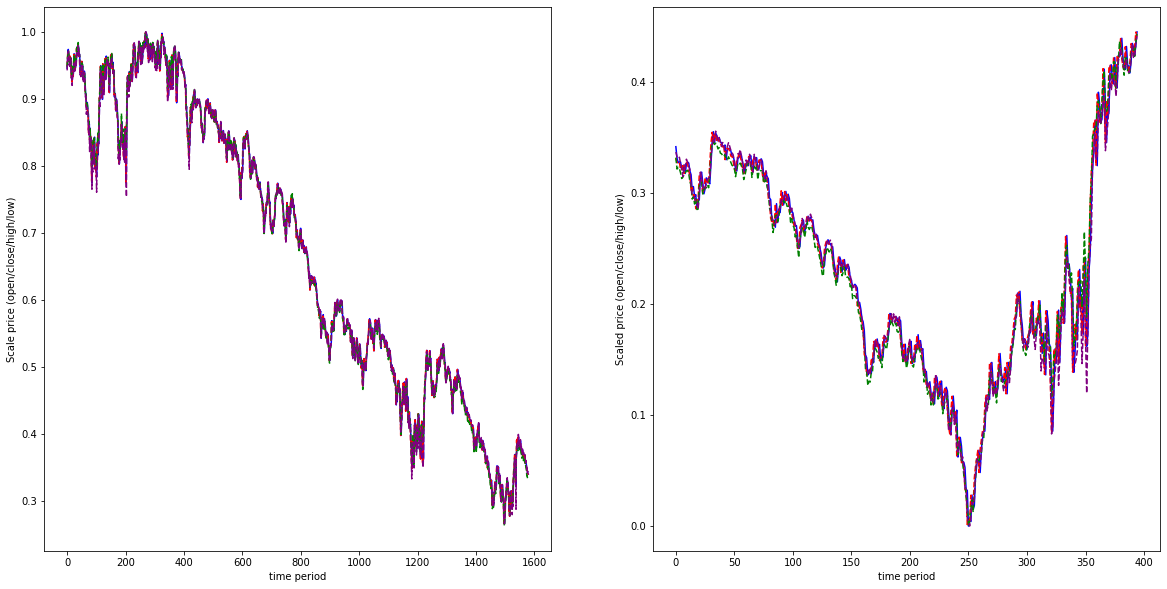

In [41]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(y_train_c, color="blue", label="Closing Price")
plt.plot(y_train_o, color="red", linestyle='--', label="Open")
plt.plot(y_train_h, color="green", linestyle='--', label="High")
plt.plot(y_train_l, color="purple", linestyle='--', label="Low")
plt.xlabel('time period')
plt.ylabel('Scale price (open/close/high/low)')


plt.subplot(1, 2, 2)
plt.plot(y_test_c, color="blue", label="Closing Price")
plt.plot(y_test_o, color="red", linestyle='--', label="Open")
plt.plot(y_test_h, color="green", linestyle='--', label="High")
plt.plot(y_test_l, color="purple", linestyle='--', label="Low")
plt.xlabel('time period')
plt.ylabel('Scaled price (open/close/high/low)')

plt.show()

In [42]:
# suffix x to mark as 'high' column

x_train_h = torch.from_numpy(x_train_h).type(torch.Tensor)
x_test_h = torch.from_numpy(x_test_h).type(torch.Tensor)
y_train_h = torch.from_numpy(y_train_h).type(torch.Tensor)
y_test_h = torch.from_numpy(y_test_h).type(torch.Tensor)

# Setup run time device to GPU if available
Hearty Thanks to [Google Colab](https://colab.research.google.com/).

We trained and tested our model using GPU provided by Google Colab.

In [43]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Hyper-parameters
1. Setting up hyper parameters for LSTM and GRU models.


In [44]:
input_dim = 1     # Number of features/columns used in training/testing. If we plann to use close price and open price for prediction, this would be changed to 2
hidden_dim = 32   # Hidden dimension
num_layers = 1    # Number for LSTM/GRU layer(s) used. We are using only 1. If we plan to use bi-directional RNN then this would be changed to 2
output_dim = 1    # Dimension of the output we are trying to predict (either close price/ open price/ high / low)

  2. Setting up other hyper-parameters for training


In [45]:
num_epochs = 10000 # we train our LSTM/GRU models for 10000 epochs
# we use Adam Optimizer and MSE loss fucntion for trainig the models

# Model

1. LSTM - Long Short Term Memory

In [46]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # we need to detach h0 and c0 here since we are doing back propagation through time (BPTT)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

2. GRU - Gated Recurrent Unit

In [47]:

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
 
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        # we need to detach h0 here since we are doing back propagation through time (BPTT)
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

Fucntion to train the models for `num_epoch`. After every 100th epoch, we print the training loss and test loss

In [48]:
def train(net, x_train, y_train, x_test, y_test, criterion, optimizer):
  print(net)
  net.to(device)
  start_time = time.time()

  hist = []
  
  for t in range(num_epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
      
    y_train_pred = net(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    hist.append(loss.item())
    if t !=0 and t % 100 == 0 :
      print(' Epoch: {:.6f} \t Training loss: {:.6f} ' .format(t, loss.item()))
      test_loss = criterion(net(x_test.to(device)), y_test.to(device)).item()
      print(' Epoch: {:.6f} \t Test loss: {:.6f} ' .format(t, test_loss))
    
  training_time = time.time()-start_time
  print("Training time: {}".format(training_time))

  return np.array(hist)

## Training and Evaluating on Open Price

In the below cell, create an instance of the `LSTM` model (net_lstm_o)

Train the model using `Adam` optimizer and `MSE` loss function for `num_epochs`.

In [49]:
net_lstm_h = LSTM(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_lstm_h.parameters(), lr=0.0005)
hist_lstm = train(net_lstm_h, x_train_h, y_train_h, x_test_h, y_test_h, criterion, optimizer)

LSTM(
  (lstm): LSTM(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
 Epoch: 100.000000 	 Training loss: 0.026113 
 Epoch: 100.000000 	 Test loss: 0.093711 
 Epoch: 200.000000 	 Training loss: 0.009839 
 Epoch: 200.000000 	 Test loss: 0.049901 
 Epoch: 300.000000 	 Training loss: 0.000537 
 Epoch: 300.000000 	 Test loss: 0.008095 
 Epoch: 400.000000 	 Training loss: 0.000495 
 Epoch: 400.000000 	 Test loss: 0.006809 
 Epoch: 500.000000 	 Training loss: 0.000475 
 Epoch: 500.000000 	 Test loss: 0.006405 
 Epoch: 600.000000 	 Training loss: 0.000456 
 Epoch: 600.000000 	 Test loss: 0.005987 
 Epoch: 700.000000 	 Training loss: 0.000439 
 Epoch: 700.000000 	 Test loss: 0.005568 
 Epoch: 800.000000 	 Training loss: 0.000424 
 Epoch: 800.000000 	 Test loss: 0.005164 
 Epoch: 900.000000 	 Training loss: 0.000411 
 Epoch: 900.000000 	 Test loss: 0.004786 
 Epoch: 1000.000000 	 Training loss: 0.000401 
 Epoch: 1000.000000 	 Test loss: 0.004446 
 Epoch: 1100

In [50]:
net_gru_h = GRU(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(net_gru_h.parameters(), lr=0.0005)
hist_gru = train(net_gru_h, x_train_h, y_train_h, x_test_h, y_test_h, criterion, optimizer)

GRU(
  (gru): GRU(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
 Epoch: 100.000000 	 Training loss: 0.022085 
 Epoch: 100.000000 	 Test loss: 0.092653 
 Epoch: 200.000000 	 Training loss: 0.007908 
 Epoch: 200.000000 	 Test loss: 0.038560 
 Epoch: 300.000000 	 Training loss: 0.000310 
 Epoch: 300.000000 	 Test loss: 0.002291 
 Epoch: 400.000000 	 Training loss: 0.000296 
 Epoch: 400.000000 	 Test loss: 0.002357 
 Epoch: 500.000000 	 Training loss: 0.000285 
 Epoch: 500.000000 	 Test loss: 0.002201 
 Epoch: 600.000000 	 Training loss: 0.000275 
 Epoch: 600.000000 	 Test loss: 0.002041 
 Epoch: 700.000000 	 Training loss: 0.000265 
 Epoch: 700.000000 	 Test loss: 0.001882 
 Epoch: 800.000000 	 Training loss: 0.000256 
 Epoch: 800.000000 	 Test loss: 0.001729 
 Epoch: 900.000000 	 Training loss: 0.000247 
 Epoch: 900.000000 	 Test loss: 0.001585 
 Epoch: 1000.000000 	 Training loss: 0.000240 
 Epoch: 1000.000000 	 Test loss: 0.001453 
 Epoch: 1100.00

Plot the traning loss across epochs for both LSTM and GRU

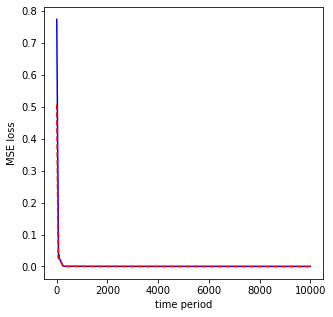

In [51]:
# Plotting
fig = plt.figure(figsize=(5, 5))
plt.plot(hist_lstm, color="blue", label="Training MSE for lstm")
plt.plot(hist_gru, color="red", linestyle='--', label="Training MSE for gru")
plt.xlabel('time period')
plt.ylabel('MSE loss')
plt.show()

Predict values on test data. We need to detach the value from the computational graph and copy it to cpu (incase we are training  on GPU)

In [52]:
pred_gru_h = net_gru_h(x_test_h.to(device)).detach().cpu()
pred_lstm_h = net_lstm_h(x_test_h.to(device)).detach().cpu()

Visualize the test data, values predicted by LSTM and GRU model.

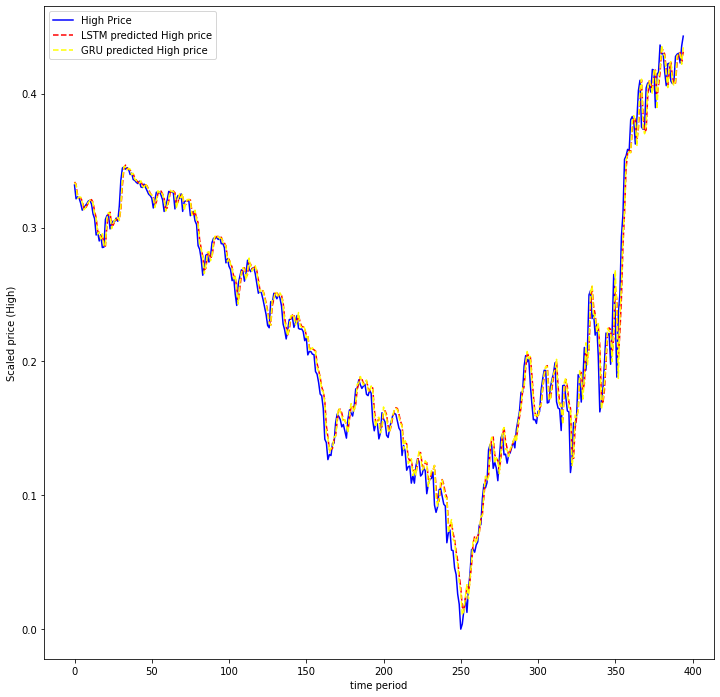

In [53]:
# Plotting
fig = plt.figure(figsize=(12, 12))
plt.plot(y_test_h, color="blue", label="High Price")
plt.plot(pred_lstm_h, color="red", linestyle='--', label="LSTM predicted High price")
plt.plot(pred_gru_h, color="yellow", linestyle='--', label="GRU predicted High price")

plt.xlabel('time period')
plt.ylabel('Scaled price (High)')

plt.legend()
plt.show()

Yay! 
Now let's predict the future `high` price using our trained GRU model and plot.

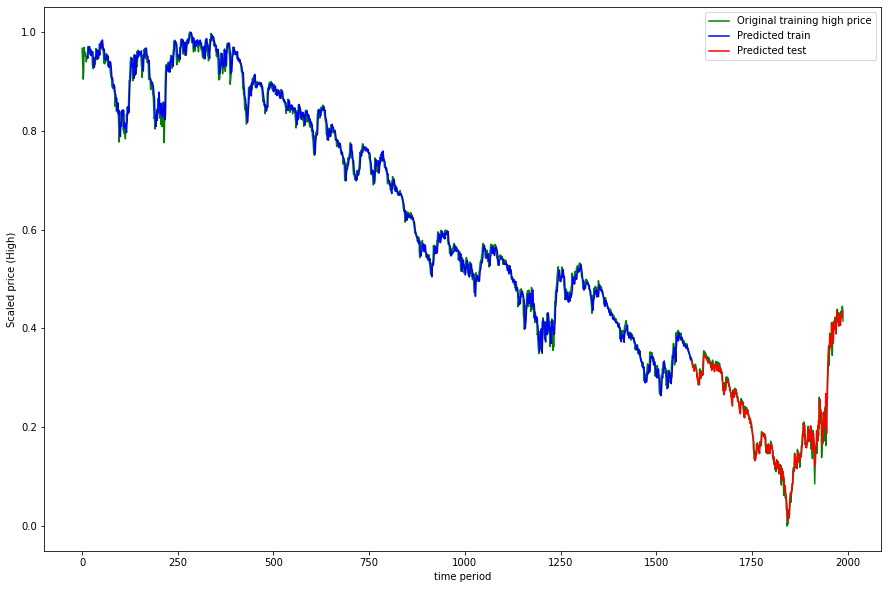

In [54]:
# train prediction
trainPred = net_gru_h(x_train_h.to(device)).detach().cpu()
trainPredPlot = np.empty_like(high)
trainPredPlot[:, :] = np.nan
trainPredPlot[lookback:len(trainPred)+lookback, :] = trainPred

#test preediction
testPredPlot = np.empty_like(high)
testPredPlot[:] = np.nan
testPredPlot[len(trainPred)+lookback-1:len(high)-1, :] = pred_gru_h

plt.figure(figsize=(15, 10))
plt.plot(open, color="green", label = "Original training high price")
plt.plot(trainPredPlot, color="blue", label="Predicted train")
plt.plot(testPredPlot, color="red", label="Predicted test")
plt.legend()

plt.xlabel('time period')
plt.ylabel('Scaled price (High)')

plt.show()

## Observations:


1.   For same optimizer, loss function, number of epochs etc., both GRU and LSTM models are able to closely fit the test data.
2.   GRU takes lesser training time compared to LSTM (as expectd).

3.   GRU performs slightly better that LSTM on the test data90.



# NLP Part

In [79]:
# We concatenate all news headlines of a day into one and uses the tf-idf scheme to extract a feature vector.
# An SVM with rbf kernel without optimization of hyperparameters is used as a classifier.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from datetime import date


In [80]:
# read data
data = pd.read_csv("Datasets/Combined_News_DJIA.csv")

# concatenate all news into one
data["combined_news"] = data.filter(regex=("Top.*")).apply(lambda x: ''.join(str(x.values)), axis=1)

In [81]:
# convert to feature vector
feature_extraction = TfidfVectorizer()
X = feature_extraction.fit_transform(data["combined_news"].values)

In [82]:
# split into training- and test set
num_training = data[data['Date'] < '20150101'].shape[0]
X_train = X[:num_training]
X_test = X[num_training:]
y_train = data["Label"].values[:num_training]
y_test = data["Label"].values[num_training:]


# Model 1
### SVC with tf-idf vectorizer 
Accuracy: 53.9% <br/>
ROC-AUC: 0.52

In [83]:
# train classifier
clf = SVC(probability=True, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
# predict and evaluate predictions
predictions = clf.predict_proba(X_test)
print('ROC-AUC score is ' + str(roc_auc_score(y_test, predictions[:,1])))

ROC-AUC score is 0.5211734693877551


In [85]:
predicted = clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score

print('Accuracy using Support Vector Classifier with TF-IDF ' + str(accuracy_score(y_test, predicted)))

Accuracy using Support Vector Classifier with TF-IDF 0.5396825396825397


# Model 2
### Logistic Regression with count vectorizer (3-gram)
Accuracy: 85.7% <br/>
ROC-AUC: 0.95

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [88]:
data = pd.read_csv("Datasets/Combined_News_DJIA.csv")
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

In [89]:
# Removing punctuations
slicedData= train.iloc[:,2:27]
slicedData.replace(to_replace="[^a-zA-Z]", value=" ", regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
slicedData.columns= new_Index
slicedData.head(5)

# Convertng headlines to lower case
for index in new_Index:
    slicedData[index]=slicedData[index].str.lower()
slicedData.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


In [90]:
headlines = []
for row in range(0,len(slicedData.index)):
    headlines.append(' '.join(str(x) for x in slicedData.iloc[row,0:25]))
    
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [91]:
basicvectorizer = CountVectorizer(ngram_range=(1,1))
basictrain = basicvectorizer.fit_transform(headlines)
print(basictrain.shape)

(1863, 32377)


In [92]:
# Model: logistic regression
# 1-gram
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [93]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [94]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [95]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,154,32
1,29,163


In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions))
print (accuracy_score(test["Label"], predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       186
           1       0.84      0.85      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378

0.8386243386243386


In [97]:
# 2-gram
basicvectorizer2 = CountVectorizer(ngram_range=(1,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)
print(basictrain2.shape)

basicmodel2 = LogisticRegression()
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])

basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)

pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))

(1863, 436354)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       186
           1       0.84      0.85      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378

0.8412698412698413


In [98]:
# 3-gram
basicvectorizer3 = CountVectorizer(ngram_range=(2,3))
basictrain3 = basicvectorizer3.fit_transform(headlines)
print(basictrain3.shape)

basicmodel3 = LogisticRegression()
basicmodel3 = basicmodel3.fit(basictrain3, train["Label"])

basictest3 = basicvectorizer3.transform(testheadlines)
predictions3 = basicmodel3.predict(basictest3)

pd.crosstab(test["Label"], predictions3, rownames=["Actual"], colnames=["Predicted"])

print (classification_report(test["Label"], predictions3))
print (accuracy_score(test["Label"], predictions3))


(1863, 1095042)
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       186
           1       0.82      0.92      0.87       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378

0.8571428571428571


ROC-AUC is :0.9566252240143369


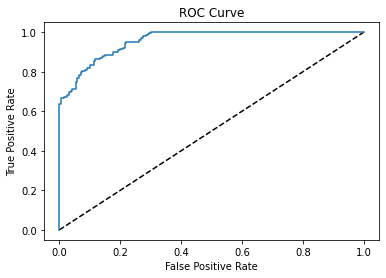

In [99]:
# Generating the ROC curve
y_pred_proba_pca = basicmodel3.predict_proba(basictest3)[:,1]
fpr, tpr, thresholds = roc_curve(test["Label"], y_pred_proba_pca)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("ROC-AUC is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()


# Model 3
### Combined Dataset: Numerical values + Sentiments (Linear Discriminant Analysis)
Accuracy: 94.3% <br/>
ROC-AUC: 0.5

In [101]:
# Loading the dataset to a dataframe
import os
sentence_file = "./Datasets/combined_stock_data.csv"
sentence_df = pd.read_csv(sentence_file, parse_dates=[1])

In [102]:
sentence_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'

In [103]:
# Load the stock prices dataset into a dataframe and check the top 5 rows
stock_prices = "Datasets/upload_DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [104]:
# Create a dataframe by merging the headlines and the stock prices dataframe
merged_dataframe = sentence_df[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)

# Check the shape and top 5 rows of the merged dataframe
print(merged_dataframe.shape)
merged_dataframe.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [105]:
# Push the Label column to the end of the dataframe
cols = list(merged_dataframe)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.loc[:, cols]

# Change the datatype of the volume column to float
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0
1,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1
2,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0
3,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1


In [106]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(merged_dataframe.describe())

       Subjectivity  Objectivity  ...     Adj Close        Label
count   1986.000000  1986.000000  ...   1989.000000  1989.000000
mean      56.712522    43.287478  ...  13463.032255     0.535445
std       21.557927    21.557927  ...   3144.006996     0.498867
min        0.000000     0.000000  ...   6547.049805     0.000000
25%       40.000000    28.571429  ...  10913.379883     0.000000
50%       54.545455    45.454545  ...  13025.580078     1.000000
75%       71.428571    60.000000  ...  16478.410156     1.000000
max      100.000000   100.000000  ...  18312.390625     1.000000

[8 rows x 12 columns]


In [107]:
# Change the NaN values to the mean value of that column
nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
for col in nan_list:
    merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())

# Separate the dataframe for input(X) and output variables(y)
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']

# Set the validation size, i.e the test set to 20%
validation_size = 0.20

# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)

X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y[0:train_size+1], y.loc[train_size: len(X.index)]

# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

In [108]:
# Evaluate each algorithm for accuracy
results = []
names = []

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu_score = accuracy_score(y_test, y_pred)
    print(name + ": " + str(accu_score))

LR: 0.5309882747068677
LDA: 0.9430485762144054
KNN: 0.45896147403685095
CART: 0.5728643216080402
NB: 0.5326633165829145
SVM: 0.5326633165829145
RF: 0.5577889447236181
XGBoost: 0.5862646566164154


In [109]:
# scaling the data for LDA model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_lda.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))


accuracy score:
0.9430485762144054
confusion matrix: 
[[254  26]
 [  8 309]]
classification report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       280
           1       0.92      0.97      0.95       317

    accuracy                           0.94       597
   macro avg       0.95      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597

accuracy score:
0.5862646566164154
confusion matrix: 
[[ 36 244]
 [  3 314]]
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.13      0.23       280
           1       0.56      0.99      0.72       317

    accuracy                           0.59       597
   macro avg       0.74      0.56      0.47       597
weighted avg       0.73      0.59      0.49       597



ROC-AUC is :0.5


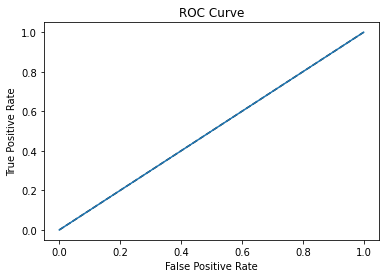

In [110]:
# Generating the ROC curve
y_pred_proba = model_lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("ROC-AUC is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()


# Model 4
### Combined Dataset: Numerical values + Sentiments (XGBoost)

Accuracy: 94.1% <br/>
ROC-AUC: 0.98

In [111]:
# Important features for XGBoost
import plotly.graph_objs as go
import plotly.offline as py

features = merged_dataframe.drop(['Label'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for XGBoost',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for XGBoost',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


In [112]:
# XGBoost: Hypertuning n_estimators and max_depth

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [200, 300, 400, 500, 600, 700]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Score is 0.5778894472361809 at depth of 1 and estimator 200
Score is 0.5896147403685092 at depth of 2 and estimator 200
Score is 0.5912897822445561 at depth of 3 and estimator 200
Score is 0.592964824120603 at depth of 4 and estimator 200
Score is 0.5795644891122278 at depth of 5 and estimator 200
Score is 0.5896147403685092 at depth of 6 and estimator 200
Score is 0.5946398659966499 at depth of 7 and estimator 200
Score is 0.5879396984924623 at depth of 8 and estimator 200
Score is 0.5695142378559463 at depth of 9 and estimator 200
Score is 0.592964824120603 at depth of 10 and estimator 200
Score is 0.576214405360134 at depth of 1 and estimator 300
Score is 0.5862646566164154 at depth of 2 and estimator 300
Score is 0.5963149078726968 at depth of 3 and estimator 300
Score is 0.5896147403685092 at depth of 4 and estimator 300
Score is 0.5946398659966499 at depth of 5 and estimator 300
Score is 0.5879396984924623 at depth of 6 and estimator 300
Score is 0

In [113]:
#Fine tuning with important features

imp_features_df = merged_dataframe[['Low', "Neutral", 'Close', 'Objectivity', 'Date']]
Xi_train, Xi_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(Xi_train, y_train)
yi_pred = clf.predict(Xi_test)
score = accuracy_score(y_test, yi_pred)
print("Score is "+ str(score))


Score is 0.6164154103852596


In [114]:
#PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


In [115]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size: len(X.index), :]

clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))


Score is 0.9413735343383585


In [116]:
pca_matrix = confusion_matrix(y_test, y_pred_pca)
pca_report = classification_report(y_test, y_pred_pca)
print("Confusion Matrix: \n" + str(pca_matrix))
print("Classification report: \n" + str(pca_report))

Confusion Matrix: 
[[258  22]
 [ 13 304]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       280
           1       0.93      0.96      0.95       317

    accuracy                           0.94       597
   macro avg       0.94      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597



ROC-AUC is :0.9877309598918433


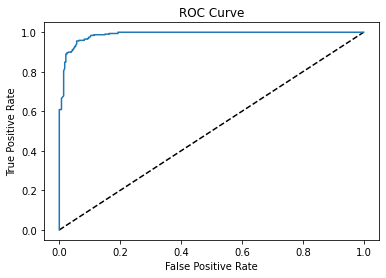

In [117]:
# Generating the ROC curve
y_pred_proba_pca = clf.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("ROC-AUC is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()
